<a href="https://colab.research.google.com/github/DNKFI/Adaptive-UAV-Communication/blob/main/FSO_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
%%capture
!pip install pycaret

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *


In [106]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test

temperature     pressure   humidity  wind_speed  wind_speed_variance  \
0      329.388595  1006.190213  54.429648    2.103704             2.200480   
1      304.826588  1001.467662  10.708639    5.183507             1.205293   
2      300.983059  1000.648449  18.517694    2.172147             1.870007   
3      309.058469  1004.666610  46.750489    5.257677             2.495395   
4      308.251990   997.658034  56.608826    9.996864             2.631680   
...           ...          ...        ...         ...                  ...   
1997   314.033202   982.717757  55.848631    8.035776             1.083448   
1998   319.880208   988.168069  63.395521    6.480513             2.162368   
1999   321.328250   990.748842  54.219718    2.225572             2.890745   
2000   312.053438   993.865338  39.465236    2.125347             1.988304   
2001   290.204901   981.008142  32.689323    3.109488             1.729756   

            C_n_sq  
0     3.970000e-18  
1     2.520000e-18  
2     3.330000e-18  
3     2.680000e-18  
4     2.540000e-18  
...            ...  
1997  2.600000e-18  
1998  2.740000e-18  
1999  4.130000e-18  
2000  3.610000e-18  
2001  2.750000e-18  

[2002 rows x 6 columns]

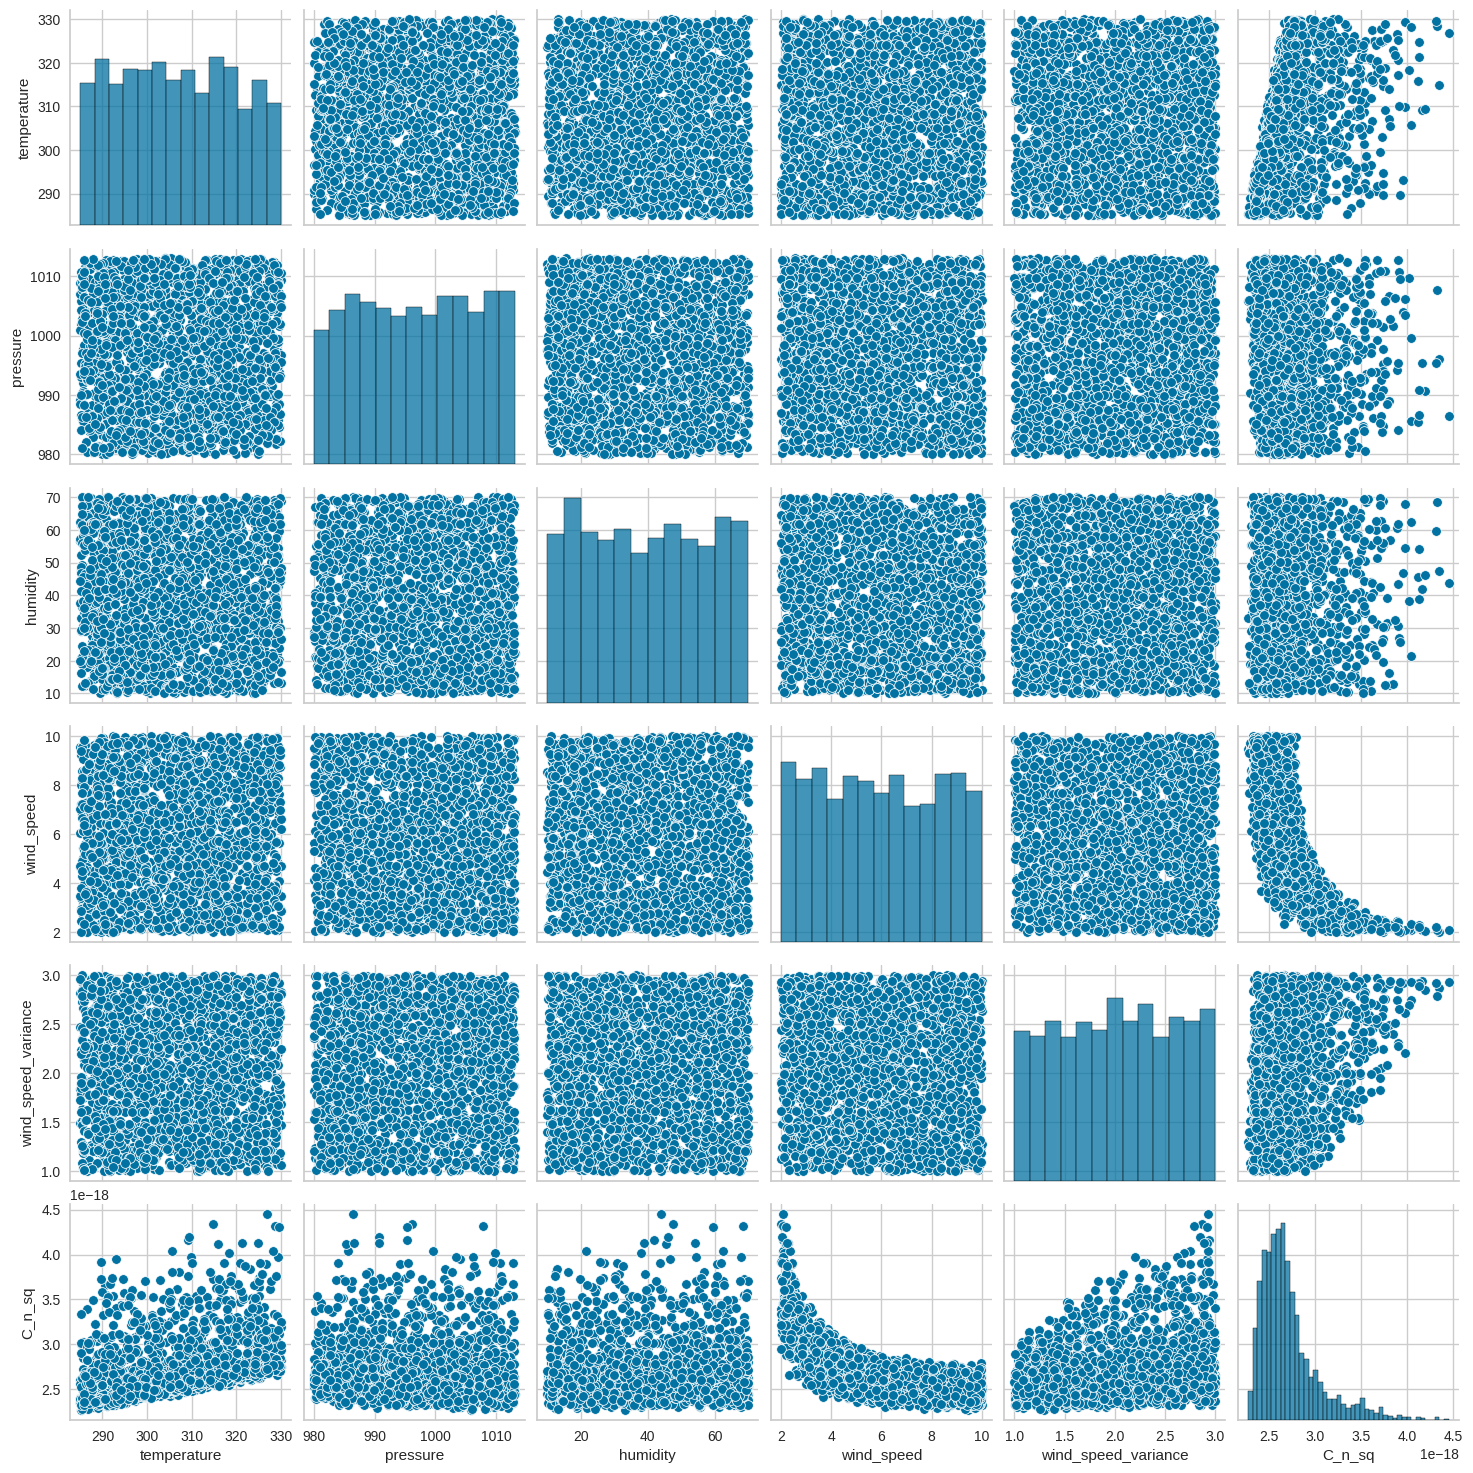

In [107]:
# prompt: Using dataframe test: 2D for all inputs

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot to visualize relationships between all numerical variables
sns.pairplot(test)
plt.savefig('Original_data.eps', format='eps')
# Display the plot
plt.show()


In [108]:
input_data=train.iloc[:,:-1]
column_stds = np.std(input_data, axis=0)

# Set the noise level as a fraction of the column's standard deviation
noise_level = 0.1 # Adjust this factor based on desired noise intensity

# Generate noise for each column, scaled by the column's standard deviation
noise = np.random.normal(loc=0.0, scale=column_stds * noise_level, size=input_data.shape)
#Generate a random DataFrame with entries of 0 and 1
df_random = np.random.randint(0, 2, size=input_data.shape)
# Add the noise to the original data
perturbed_train = input_data + noise * df_random
train.iloc[:,:-1]=perturbed_train

In [109]:
#10*np.log10(np.var(input_data, axis=0)/np.var(noise, axis=0))

In [110]:
input_data=test.iloc[:,:-1]
column_stds = np.std(input_data, axis=0)

# Generate noise for each column, scaled by the column's standard deviation
noise = np.random.normal(loc=0.0, scale=column_stds * noise_level, size=input_data.shape)
#Generate a random DataFrame with entries of 0 and 1
df_random = np.random.randint(0, 2, size=input_data.shape)
# Add the noise to the original data
perturbed_test = input_data + noise * df_random
test.iloc[:,:-1]=perturbed_test
test

temperature     pressure   humidity  wind_speed  wind_speed_variance  \
0      329.388595  1006.839776  54.429648    2.369612             2.206658   
1      304.826588  1002.807242  11.911367    5.183507             1.205293   
2      300.983059  1000.648449  19.920839    1.869942             1.848861   
3      309.058469  1004.666610  46.750489    5.188567             2.625336   
4      308.385783   997.658034  56.608826    9.996864             2.631680   
...           ...          ...        ...         ...                  ...   
1997   313.179863   982.612844  57.865821    7.530200             1.014195   
1998   319.226501   988.168069  62.862698    6.480513             2.214334   
1999   321.328250   990.748842  54.219718    2.006595             2.895578   
2000   312.053438   993.865338  39.465236    2.125347             1.965375   
2001   290.204901   980.803516  32.689323    3.109488             1.687482   

            C_n_sq  
0     3.970000e-18  
1     2.520000e-18  
2     3.330000e-18  
3     2.680000e-18  
4     2.540000e-18  
...            ...  
1997  2.600000e-18  
1998  2.740000e-18  
1999  4.130000e-18  
2000  3.610000e-18  
2001  2.750000e-18  

[2002 rows x 6 columns]

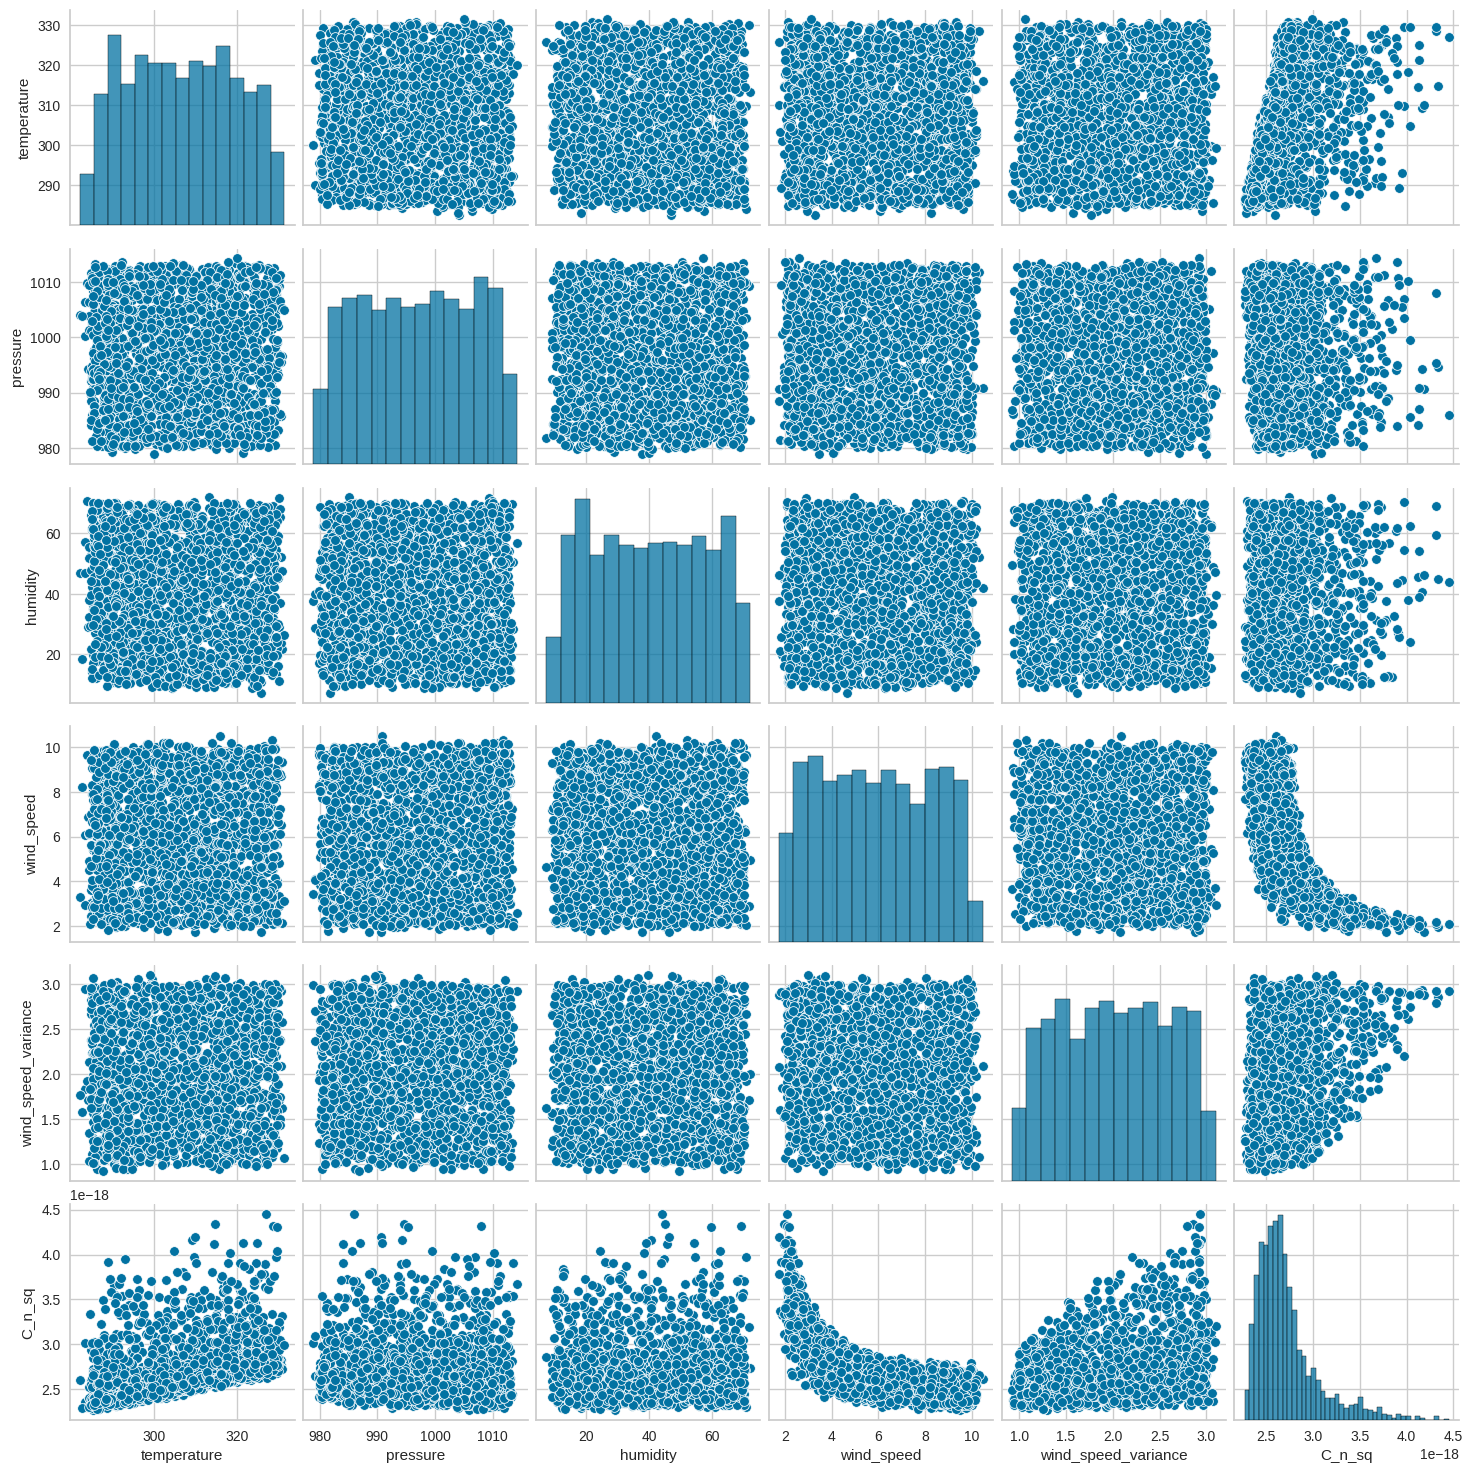

In [111]:
# prompt: Using dataframe test: 2D for all inputs

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot to visualize relationships between all numerical variables
sns.pairplot(test)
plt.savefig('Noisy_data.eps', format='eps')
# Display the plot
plt.show()


In [112]:
train[train.columns[5]]=train[train.columns[5]]/1e-18
test[test.columns[5]]=test[test.columns[5]]/1e-18

In [113]:
s = setup(train, target = 'C_n_sq')

In [114]:
best_model = compare_models(fold=3)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [115]:
import pycaret.regression as pycr
et = pycr.create_model('et')
lightgbm = pycr.create_model('lightgbm')
gbr = pycr.create_model('gbr')
# et = pycr.create_model('knn')
# lightgbm = pycr.create_model('lr')
# gbr = pycr.create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [116]:
# et = tune_model(et)
# lightgbm = tune_model(lightgbm)
# gbr = tune_model(gbr)

In [117]:
et = finalize_model(et)
lightgbm = finalize_model(lightgbm)
gbr = finalize_model(gbr)

In [118]:
predictions_et = predict_model(et, data=test)
predictions_gbr = predict_model(gbr, data=test)
predictions_lightgbm = predict_model(lightgbm, data=test)

In [123]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [120]:
plot_model(lightgbm, plot = 'feature', save=True)
# plt.savefig('feature_importance.eps', format='eps')

'Feature Importance.png'

In [121]:
# plot_model(et, plot = 'learning')
# plot_model(gbr, plot = 'learning')
# plot_model(lightgbm, plot = 'learning')
# plt.savefig('learning_et.eps', format='eps')

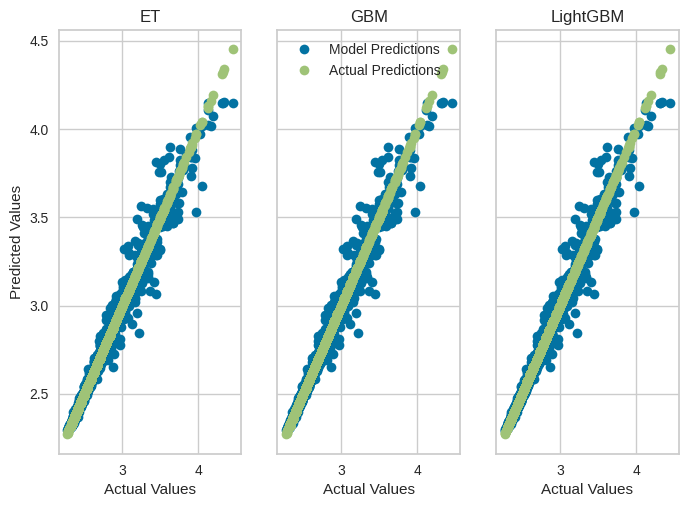

In [122]:
fig, axs = plt.subplots(1, 3)

x = predictions_et[predictions_et.columns[5]]
y = predictions_et[predictions_et.columns[6]]
axs[0].plot(x, y, 'o')
axs[0].plot(x, x, 'o')
axs[0].set_title('ET')
axs[0].set(xlabel='Actual Values', ylabel='Predicted Values')
x = predictions_et[predictions_gbr.columns[5]]
y = predictions_et[predictions_gbr.columns[6]]
axs[1].plot(x, y, 'o')
axs[1].plot(x, x, 'o')
axs[1].legend(["Model Predictions", "Actual Predictions"])
axs[1].set_title('GBM')
axs[1].set(xlabel='Actual Values', ylabel='Predicted Values')
x = predictions_et[predictions_lightgbm.columns[5]]
y = predictions_et[predictions_lightgbm.columns[6]]
axs[2].plot(x, y, 'o')
axs[2].plot(x, x, 'o')
axs[2].set_title('LightGBM')
axs[2].set(xlabel='Actual Values', ylabel='Predicted Values')

# for ax in axs.flat:
#     ax.set(xlabel='Actual Values', ylabel='Predicted Values')
for ax in axs.flat:
    ax.label_outer()


plt.savefig('All_Models_Actual_vs_Predicted-1.eps', format='eps')